In [4]:
pip install "numpy<2.0"

In [2]:
pip install spacy

In [38]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ----------- ---------------------------- 3.7/12.8 MB 18.1 MB/s eta 0:00:01
     ----------------------- ---------------- 7.6/12.8 MB 18.8 MB/s eta 0:00:01
     ------------------------------- ------- 10.5/12.8 MB 17.2 MB/s eta 0:00:01
     --------------------------------------- 12.8/12.8 MB 16.7 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [1]:
import numpy as np 
import pandas as pd 
import string 
import spacy 
import warnings
warnings.filterwarnings("ignore")
from matplotlib import pyplot as plt

### Emotion Mining

In [3]:
import pandas as pd
#Sentiment analysis
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [5]:
afinn[1500:]

,word,value
1500,masterpieces,4
1501,matter,1
1502,matters,1
1503,mature,2
1504,meaningful,2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [7]:
afinn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2477 entries, 0 to 2476
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   word    2477 non-null   object
 1   value   2477 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 38.8+ KB


In [9]:
import pandas
book=pd.read_csv("apple.txt",on_bad_lines='skip')
book

,x
0,It's amazing..... battery last around 10 -12 h...
1,Finally a MacBook possession. Got it in 50k in...
2,Best Laptop under 60k. If you don't want any a...
3,Pros:1. Light weight and super fast response t...
4,""""
5,I am very upset about the product as I checked...
6,Reason for 1 star is I ot an defective piece. ...
7,Got the Apple Macbook air on amazon discount s...
8,White line coming on screen in just three mont...
9,"Bought this product recently on 5 April, was w..."


In [26]:
# Remove punctuation from each review

for i in range(len(book)):
    str1 = book['x'][i].strip()
    if str1:
        no_punc_str = str1.translate(str.maketrans('', '', string.punctuation))
    book['x'][i]=no_punc_str.lower()

In [28]:
book

,x
0,its amazing battery last around 10 12 hrsbest ...
1,finally a macbook possession got it in 50k in ...
2,best laptop under 60k if you dont want any acc...
3,pros1 light weight and super fast response tim...
4,
5,i am very upset about the product as i checked...
6,reason for 1 star is i ot an defective piece t...
7,got the apple macbook air on amazon discount s...
8,white line coming on screen in just three mont...
9,bought this product recently on 5 april was wo...


In [11]:
# Convert the affin dataframe to dictionary
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [13]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.

nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        # print(sentence)
        for word in sentence:
            # print(word, sentiment_lexicon.get(word.lemma_, 0))
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [15]:
# Sample demo
exstring = "I am excited to purchase apple macbook. Its battery is excellent and giving high backup"
calculate_sentiment(exstring)

6

In [17]:
exstring2 =" I purchased the laptop which has worst display and very low battery backup"
calculate_sentiment(exstring2)

-3

In [19]:
# test that it works
calculate_sentiment(text = 'The battery lasts long and no heating issues, great performance and happy with the purchase')

5

In [21]:
book['sentiment_value'] = book['x'].apply(calculate_sentiment)

In [23]:
book

,x,sentiment_value
0,It's amazing..... battery last around 10 -12 h...,7
1,Finally a MacBook possession. Got it in 50k in...,1
2,Best Laptop under 60k. If you don't want any a...,10
3,Pros:1. Light weight and super fast response t...,15
4,"""",0
5,I am very upset about the product as I checked...,-7
6,Reason for 1 star is I ot an defective piece. ...,9
7,Got the Apple Macbook air on amazon discount s...,6
8,White line coming on screen in just three mont...,-1
9,"Bought this product recently on 5 April, was w...",2


In [94]:
# how many words are in the sentence?
book['word_count'] = book['x'].str.split().apply(len)
book['word_count'].head(10)

0     13
1    333
2    169
3     59
4      1
5    123
6     64
7     93
8     22
9     75
Name: word_count, dtype: int64

In [96]:
book

,x,sentiment_value,word_count
0,It's amazing..... battery last around 10 -12 h...,7,13
1,Finally a MacBook possession. Got it in 50k in...,1,333
2,Best Laptop under 60k. If you don't want any a...,10,169
3,Pros:1. Light weight and super fast response t...,15,59
4,"""",0,1
5,I am very upset about the product as I checked...,-7,123
6,Reason for 1 star is I ot an defective piece. ...,9,64
7,Got the Apple Macbook air on amazon discount s...,6,93
8,White line coming on screen in just three mont...,-1,22
9,"Bought this product recently on 5 April, was w...",2,75


In [98]:
book.sort_values(by='sentiment_value')

,x,sentiment_value,word_count
31,From the very beginning the battery life was h...,-7,37
35,Be careful while buying electronic products th...,-7,83
5,I am very upset about the product as I checked...,-7,123
34,"When i received, within 15 days i realised the...",-5,64
29,This is the worst apple product I have ever s...,-5,160
15,"I bought MacBook air in 2017, it was working f...",-4,87
26,I have my worst nightmare with the macbook air...,-4,64
24,I brought this mac air on sep 2017. From past ...,-2,69
8,White line coming on screen in just three mont...,-1,22
28,I was looking for an affordable long lasting l...,-1,72


In [100]:
# Sentiment score of the whole review
book['sentiment_value'].describe()

count    40.00000
mean      4.22500
std       8.91696
min      -7.00000
25%      -0.25000
50%       2.00000
75%       7.25000
max      44.00000
Name: sentiment_value, dtype: float64

In [102]:
# Sentiment score of the whole review
book[book['sentiment_value']<0]

,x,sentiment_value,word_count
5,I am very upset about the product as I checked...,-7,123
8,White line coming on screen in just three mont...,-1,22
15,"I bought MacBook air in 2017, it was working f...",-4,87
24,I brought this mac air on sep 2017. From past ...,-2,69
26,I have my worst nightmare with the macbook air...,-4,64
28,I was looking for an affordable long lasting l...,-1,72
29,This is the worst apple product I have ever s...,-5,160
31,From the very beginning the battery life was h...,-7,37
34,"When i received, within 15 days i realised the...",-5,64
35,Be careful while buying electronic products th...,-7,83


In [104]:
book[book['sentiment_value']<-5].head()['x'].tolist()[0:3]

['I am very upset about the product as I checked my MacBook 15 days back in December, it didn’t start. It was luckily in warranty . I took it to the service centre and they informed me the mother board and battery collapsed. If it was not in warranty I had to pay 47000/. I asked for replacement of the product and I was refused. They got it fixed for me. I don’t know why should I pay 57000/ for Mac quality. If this is the quality and the service, then I have to go to other product. In January my product expiry was due. They have give an extension of 3 months warranty when I had asked for 1 year. Very disappointed.\n            ',
 'From the very beginning the battery life was horrible . hardly 2 hours. And after using it for just a year it just stopped working . and i cannot even charge it. Terrible product sold by Amazon\n            ',
 "Be careful while buying electronic products through Amazon.I bought this macbook for 56k on March 2018. After 1.5 years of usage, the display stopped

In [106]:
book[book['sentiment_value']>15].head()['x'].tolist()[0:3]

["Apple,apple,apple, thats the first thing that must have flashed in you mind when you saw this product, so here i have a total breif review on the laptop...***Pros***4k Video Editing with Final Cut Pro X on this thing works like butter, there is heating issue that i am going to go to apple service center to get it checkedEveryday works like checking mail and is just gr8The Battery is just OVERPOWERED, works for around 11-12 hours on continuous work and 8-9 hours when editingThe graphics card scores 30 fps in cinebench which is not that badThe performance is also fine, 280 cb processor score on cinebenchSpeakers are really good with perfect bassDisplay brightness is 300 nits, which is fineThe Wi-Fi is extremely good, can get a network even from the living room while the router is in the bedroomVery thin and lightweightMacOS is good for School work if you know all the office applications for mac, for eg.Pages is WordMagSafe 2 is the best partGood Trackpad and Keyboard with backlightThe 

In [66]:
book['index']=range(0,len(book))

In [68]:
book.head()

,x,sentiment_value,word_count,index
0,its amazing battery last around 10 12 hrsbest ...,4,13,0
1,finally a macbook possession got it in 50k in ...,-1,328,1
2,best laptop under 60k if you dont want any acc...,14,168,2
3,pros1 light weight and super fast response tim...,16,59,3
4,,0,0,4


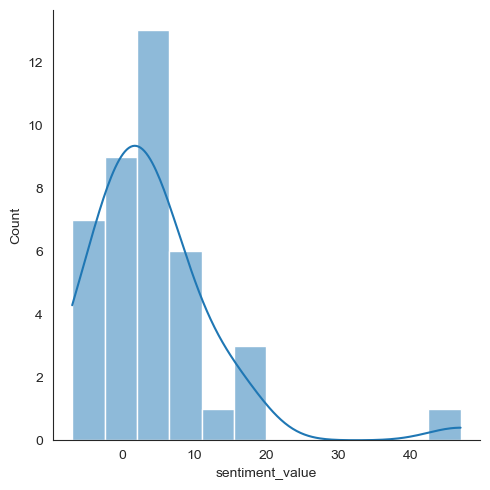

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style(style='white') 

sns.displot(data=book,x='sentiment_value',kde=True)
plt.show()

<Axes: xlabel='index', ylabel='sentiment_value'>

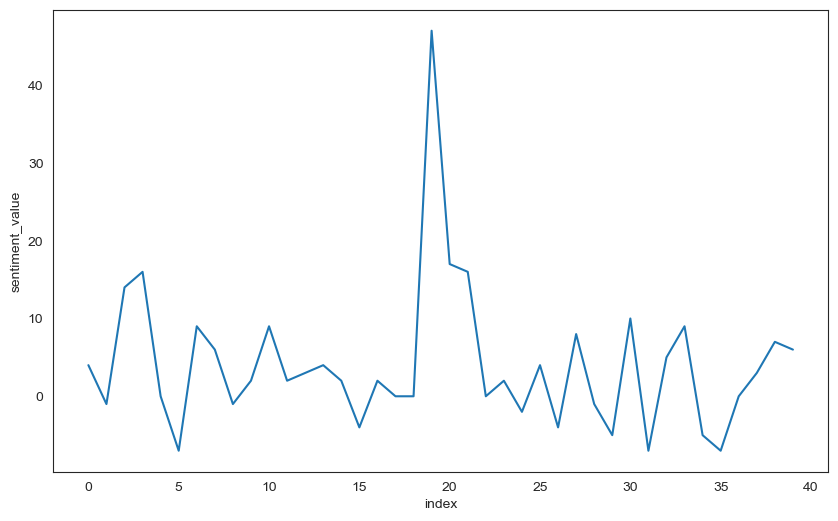

In [74]:
plt.figure(figsize=(10, 6))
sns.lineplot(y='sentiment_value',x='index',data=book)

<Axes: title={'center': 'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

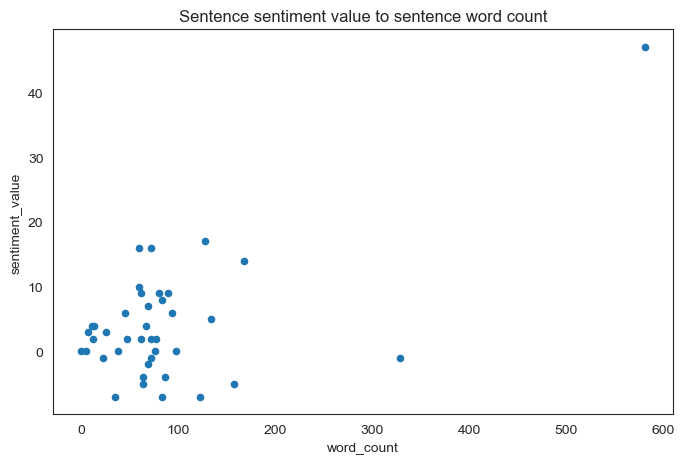

In [76]:
book.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,5), title='Sentence sentiment value to sentence word count')